# K-means clustering exercises

1. Look at the non-convex clusters below from the lecture notes.

a) Use k-means clustering with k = 2 to cluster it, visualise the results and evaluate the silohuette score of the clusters. Interpret the value.

b) Loop through values of k up to 10 and see how it affects the silohuette score. Plot your findings.

<Axes: title={'center': 'Non-convex clusters'}, xlabel='x1', ylabel='x2'>

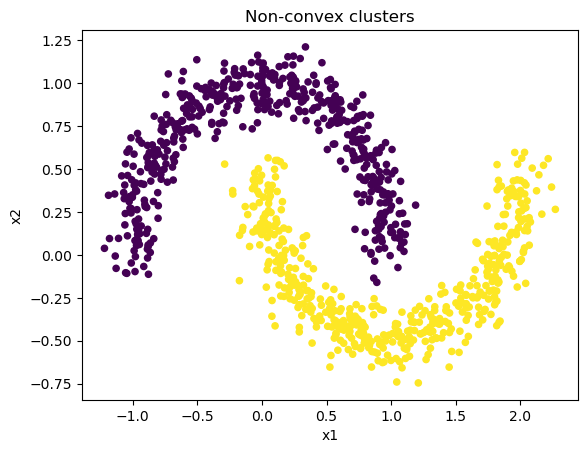

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=["x1", "x2"])
df.plot.scatter("x1", "x2", c=y, colormap="viridis", colorbar=False, title = "Non-convex clusters")

2) Code k-means clustering in numpy using the below guidelines, taken from: https://www.deep-ml.com/problems/17 (highly recommend this website for learning ML!)

**K-Means Clustering Algorithm Implementation**

*Initialization:*
Use the provided initial_centroids as your starting point. This step is already done for you in the input.

*Assignment Step:*
For each point in your dataset:
1. Calculate its distance to each centroid.
2. Assign the point to the cluster of the nearest centroid (use the Euclidean distance function).

*Update Step:*
For each cluster:
1. Calculate the mean of all points assigned to the cluster.
2. Update the centroid to this new mean position.
Hint: Be careful with potential empty clusters. Decide how you'll handle them (e.g., keep the previous centroid).

*Iteration:*
Repeat steps 2 and 3 until either:

1. The centroids no longer change significantly (this case does not need to be included in your solution), or
2. You reach the max_iterations limit.
Hint: You might want to keep track of the previous centroids to check for significant changes.

In [ ]:
def euclidean_distance(a, b):
  return np.sqrt(((a - b) ** 2).sum(axis=1))

def k_means_clustering(
    points: list[tuple[float, ...]], 
    k: int, initial_centroids: list[tuple[float, ...]], 
    max_iterations: int
    ) -> list[tuple[float, ...]]:
	# Your code here
  #转成numpy array,方便计算
  X = np.array(points)
  centroids = np.array(initial_centroids)

  for _ in range(max_iterations):
    # ---------- Assignment Step ----------
    clusters = [[] for _ in range(k)]

    for point in X:
            # 计算该点到所有 centroids 的距离
            distances = euclidean_distance(centroids, point)
            # 找最近的 centroid
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
    # ---------- Update Step ----------
    new_centroids = []

    for i in range(k):
        if len(clusters[i]) == 0:
            # 空簇：保持原 centroid
            new_centroids.append(centroids[i])
        else:
            # 计算该 cluster 中所有点的均值
            new_centroid = np.mean(clusters[i], axis=0) # 计算按列（colume）均值
            new_centroids.append(new_centroid)

    centroids = np.array(new_centroids)

  # 转回 tuple，符合函数返回类型
  #⭐ 关键：round 到 4 位小数
    final_centroids = [
        tuple(np.round(c, 4)) for c in centroids
    ]
  return final_centroids

In [3]:
# Your function should past these tests:

assert k_means_clustering([(1, 2), (1, 4), (1, 0), (10, 2), (10, 4), (10, 0)], 2, [(1, 1), (10, 1)], 10) == [(1.0, 2.0), (10.0, 2.0)]

assert k_means_clustering([(0, 0, 0), (2, 2, 2), (1, 1, 1), (9, 10, 9), (10, 11, 10), (12, 11, 12)], 2, [(1, 1, 1), (10, 10, 10)], 10) == [(1.0, 1.0, 1.0), (10.3333, 10.6667, 10.3333)]

assert k_means_clustering([(1, 1), (2, 2), (3, 3), (4, 4)], 1, [(0,0)], 10) == [(2.5, 2.5)]

assert k_means_clustering([(0, 0), (1, 0), (0, 1), (1, 1), (5, 5), (6, 5), (5, 6), (6, 6),(0, 5), (1, 5), (0, 6), (1, 6), (5, 0), (6, 0), (5, 1), (6, 1)], 4, [(0, 0), (0, 5), (5, 0), (5, 5)], 10) == [(0.5, 0.5), (0.5, 5.5), (5.5, 0.5), (5.5, 5.5)]

# K-Nearest Neighbours Exercises

3. Look at the dataset from make_circles below.

a) Try and fit from values k = 1 -> 100 (use the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function. Plot k against model score and choose which value of k is best, justify your decision.

b) Plot a [decision boundary](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) for the best score.

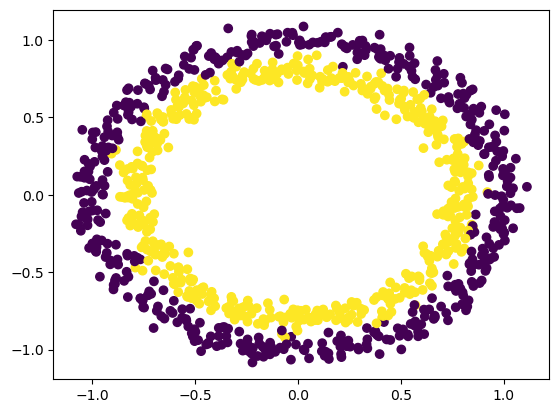

In [6]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)

# plot it
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis")

a)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define model
knn = KNeighborsClassifier()

# Parameter grid
param_grid = {
    "n_neighbors": np.arange(1, 101)
}

# Grid search with 5-fold CV
grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X, y)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'n_neighbors': array([ 1, ...98, 99, 100])}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and 

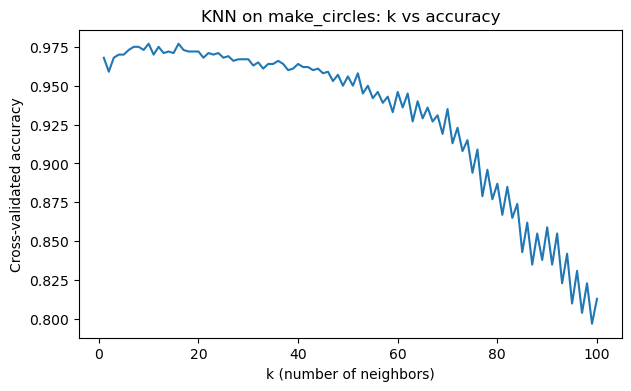

Best k: 10
Best CV accuracy: 0.977


In [9]:
#提取结果并画 k vs score
k_values = grid.cv_results_["param_n_neighbors"].data
mean_scores = grid.cv_results_["mean_test_score"]
plt.figure(figsize=(7, 4))
plt.plot(k_values, mean_scores)
plt.xlabel("k (number of neighbors)")
plt.ylabel("Cross-validated accuracy")
plt.title("KNN on make_circles: k vs accuracy")
plt.show()

#选最优K
best_k = grid.best_params_["n_neighbors"]
best_score = grid.best_score_

print("Best k:", best_k)
print("Best CV accuracy:", best_score)


b)

<Figure size 600x600 with 0 Axes>

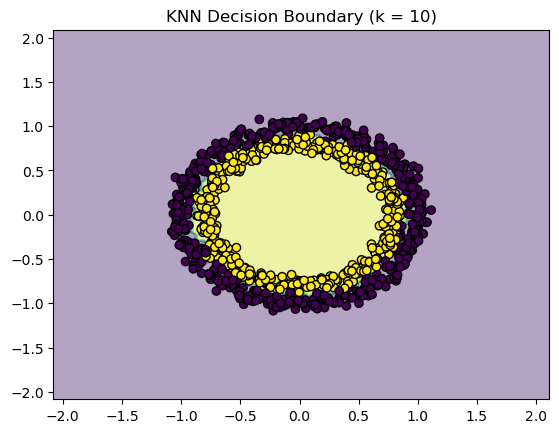

In [11]:
#用最优K训练模型并画决策边界
from sklearn.inspection import DecisionBoundaryDisplay

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X, y)

plt.figure(figsize=(6, 6))
DecisionBoundaryDisplay.from_estimator(
    knn_best,
    X,
    response_method="predict",
    cmap="viridis",
    alpha=0.4
)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor="k")
plt.title(f"KNN Decision Boundary (k = {best_k})")
plt.show()

4. Given a list of points in n-dimensional space represented and a query point, implement a function to find the k nearest neighbors to the query point using Euclidean distance. Inspired by: https://www.deep-ml.com/problems/173

In [12]:
import numpy as np

def k_nearest_neighbors(points, query_point, k):
    """
    Find k nearest neighbors to a query point

    Args:
        points: List of tuples representing points [(x1, y1), (x2, y2), ...]
        query_point: Tuple representing query point (x, y)
        k: Number of nearest neighbors to return

    Returns:
        List of k nearest neighbor points as tuples
    """
    if not points or k <= 0:
        return []

    if k > len(points):
        k = len(points)

    # Convert to numpy arrays for vectorized operations
    points_array = np.array(points)
    query_array = np.array(query_point)

    # Put the rest of your code here!
    # 计算每个点与 query_point 的欧氏距离
    distances = np.sqrt(np.sum((points_array - query_array) ** 2, axis=1))

    # 获取距离最小的 k 个点的索引
    nearest_indices = np.argsort(distances)[:k]

    # 根据索引获取对应的点
    nearest_points = [tuple(points_array[i]) for i in nearest_indices]
    return nearest_points

In [13]:
# Your function should pass the following tests:

assert k_nearest_neighbors([(1, 2), (3, 4), (1, 1), (5, 6), (2, 3)], (2, 2), 3) == [(1, 2), (2, 3), (1, 1)]

assert k_nearest_neighbors([(0, 0), (1, 1), (2, 2), (3, 3)], (1.5, 1.5), 2) == [(1, 1), (2, 2)]

assert k_nearest_neighbors([(1, 1), (2, 2), (3, 3)], (0, 0), 1) == [(1, 1)]